In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import renormalization as rg

# Initiate a RenormalizationGroup object

In [15]:
RG = rg.RenormalizationGroup()

# RG flow

In [3]:
j, h = 1, 1e-5

RG.flow(j, h, 20)

k   J                H
______________________
0   1         1e-05
1   14.267132273170475         3.999999099590923e-05
2   56.72195547680194         0.00031999992796727383
3   226.5412466785303         0.0025599994237381907
4   905.8183082736177         0.020479995389905525
5   3622.9199784315992         0.1638399631192442
6   14490.989465321229         1.3107197049539536
7   57958.714982464706         10.485757639631629
8   231792.9168993003         83.88606111705303
9   926836.123352733         671.0884889364243
10   3704660.139455186         5368.707911491394
11   14797165.72617478         42949.66329193115
12   59016864.25153139         343597.3063354492
13   234693067.78078377         2748778.4506835938
14   927777157.3204007         21990227.60546875
15   3623147718.859728         175921820.84375
16   13788903592.063911         1407374566.75
17   49526116101.255646         11258996534.0
18   153068478269.02258         90071972272.0
19   251986023988.09033         720575778176.0
2

# Densities

In [4]:
h = 0
densities = RG.densities(h)

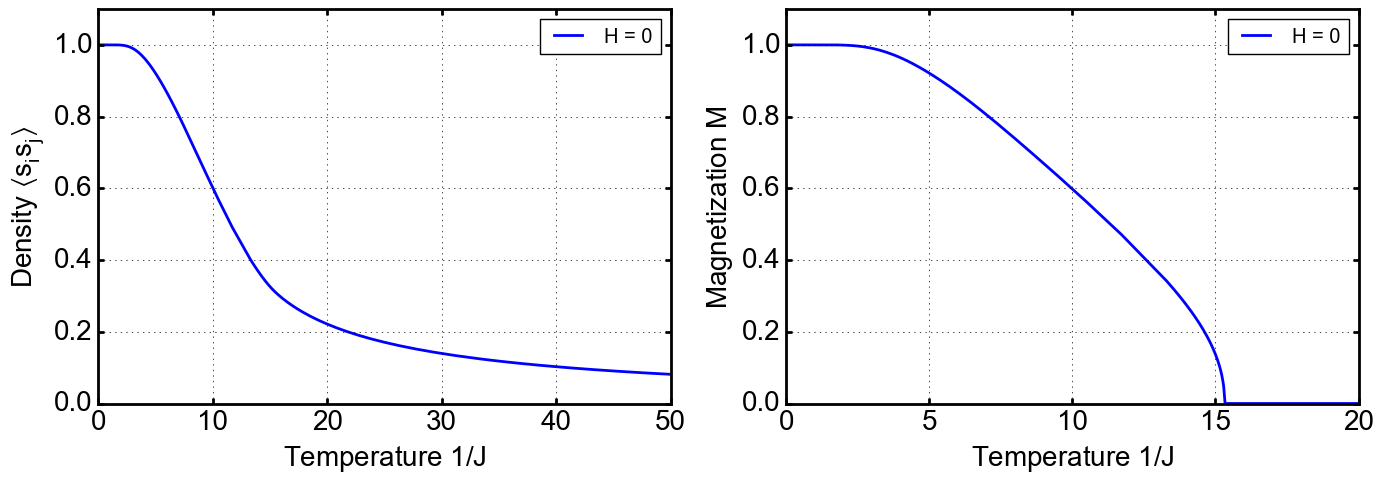

In [5]:
lw = 2
fs = 20
fig = plt.figure(figsize=(14, 5), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})

ax1 = plt.subplot(121)
ax1.plot(densities[0],  densities[1][:,1], label=f"H = {h}")
ax1.legend(loc=1)
ax1.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax1.grid()
ax1.axis([0, 50, 0, 1.1])
ax1.set_xlabel(r"Temperature $1/J$", fontsize=fs)
ax1.set_ylabel(r"Density $\langle s_i s_j \rangle$", fontsize=fs)

ax2 = plt.subplot(122)
ax2.plot(densities[0],  densities[1][:,2],  label=f"H = {h}")
ax2.legend(loc=1)
ax2.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax2.grid()
ax2.axis([0, 20, 0, 1.1])
ax2.set_xlabel(r"Temperature $1/J$", fontsize=fs)
ax2.set_ylabel(r"Magnetization $M$", fontsize=fs)

plt.show()

# Metastable droplets

In [49]:
T = 5
h_values = [0.01, 0.05, 0.5, 1, 1.5]

droplets = []
for h in h_values:
    droplets.append(RG.droplet(1 / T, h, 10))

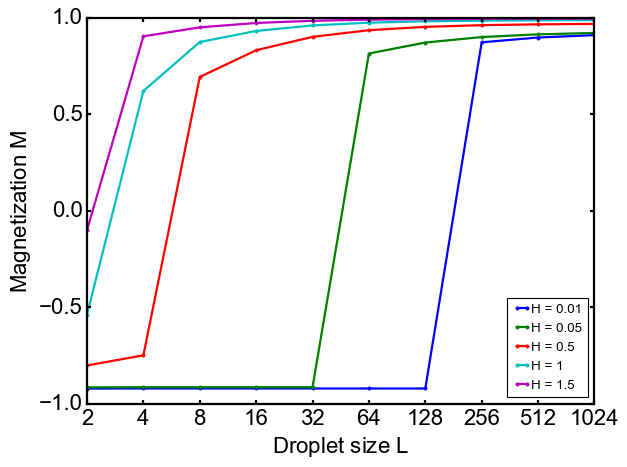

In [50]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

for i, droplet in enumerate(droplets):
    ax.plot(droplet[0], droplet[1][:,2], label=f'H = {h_values[i]}', marker='.')

ax.legend(loc='best', ncol=1, prop={'size':fs - 8}, labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel(r"Droplet size $L$", fontsize=fs)
ax.set_ylabel(r"Magnetization $M$", fontsize=fs)
ax.set_xscale('log', base=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
#plt.xlim(0.0, 2**7)

plt.show()

# Hysteresis loops

## Under constant temperature

In [3]:
T = 5
L_values = [2, 4, 8, 16, 32]

hysteresis = []
for L in L_values:
    hysteresis.append(RG.hysteresis(1 / T, L))

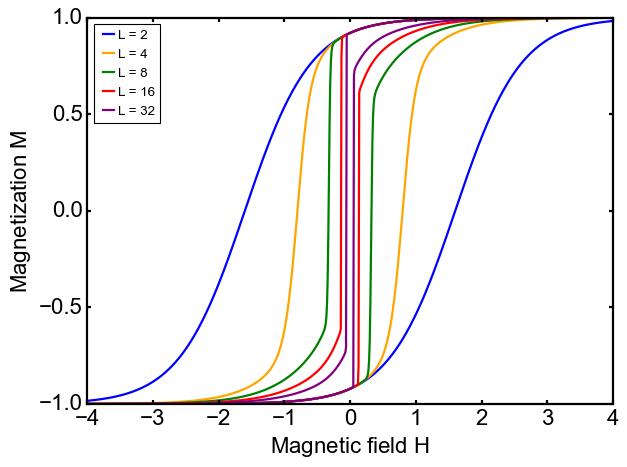

In [12]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, loop in enumerate(hysteresis):
    ax.plot(loop[0][0], loop[1][0], color=colors[i], label=f'L = {L_values[i]}')
    ax.plot(loop[0][1], loop[1][1], color=colors[i])

ax.legend(loc='best', ncol=1, prop={'size':fs - 8}, labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel(r"Magnetic field $H$", fontsize=fs)
ax.set_ylabel(r"Magnetization $M$", fontsize=fs)

plt.show()

## Under constant size

In [13]:
L = 32
T_values = [.2, .5, 1, 2, 5]

hysteresis = []
for T in T_values:
    hysteresis.append(RG.hysteresis(1 / T, L))

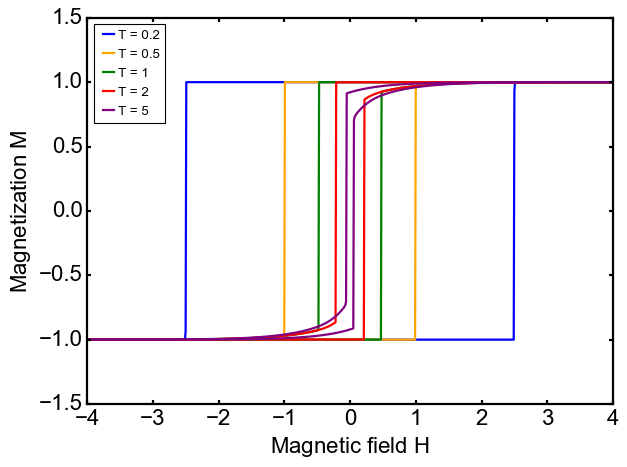

In [14]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, loop in enumerate(hysteresis):
    ax.plot(loop[0][0], loop[1][0], color=colors[i], label=f'T = {T_values[i]}')
    ax.plot(loop[0][1], loop[1][1], color=colors[i])

ax.legend(loc='best', ncol=1, prop={'size':fs - 8}, labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel(r"Magnetic field $H$", fontsize=fs)
ax.set_ylabel(r"Magnetization $M$", fontsize=fs)

plt.show()